<a href="https://colab.research.google.com/github/KaveeshBaddage/DataScienceImpl/blob/main/Generative_Adversarial_Network_(GAN)_for_MNIST_kaveesha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor


import numpy as np
import matplotlib.pyplot as plt

Load MNIST Data set to Run Time



transform=ToTensor() <- converts data in the range 0-255 to 0-1.



In [3]:
train_dataset = MNIST(
    root='data/',
    train=True,
    download=True,
    transform=ToTensor() # convert images in to tensors
    )  
print("train_dataset.data.size() ->",train_dataset.data.size())

# Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=64,
    num_workers=0
    )

test_dataset = MNIST(
    root='data/', 
    train=False, 
    transform=ToTensor()
    )
print("test_dataset_sizec ->",test_dataset.data.size())


test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=64,
    num_workers=0
    )

# # returns an iterator object for the given object.
# dataiter = iter(train_loader)
# # get Single object
# images, labels = dataiter.next()

# print("image size [0] ->",images.size(0))

# # provides a multidimensional array object,
# images = images.numpy()

# img = np.squeeze(images[1])

# fig = plt.figure(figsize = (3,3)) 
# ax = fig.add_subplot(111)
# ax.imshow(img, cmap='gray')

# # train_dataset[0] containd tensor with image properties
# # train_dataset[1] containd tensor with image label
# image, label = train_dataset[0]

# print("(train_dataset[0][0].size() ->",train_dataset[0][0].size())
# print("(train_dataset[0][1] ->",train_dataset[0][1])
# print("image size ->",image.shape)


# in_features = image.numel()
# print("in_features ->",in_features)


# out_classes = len(train_dataset.classes)
# print("out_classes ->",out_classes)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

train_dataset.data.size() -> torch.Size([60000, 28, 28])
test_dataset_sizec -> torch.Size([10000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# torch.utils.data.DataLoader Parameters

dataset (Dataset) – dataset from which to load the data.

batch_size (int, optional) – how many samples per batch to load (default: 1).

num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process.


----------

The iter() function creates an object which can be iterated one element at a time.



In [4]:
# defining Discriminator class

import torch.nn.functional as F

class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        # access methods from parent class nn.Module
        super(Discriminator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3) # randomly zeroes some of the elements of the input tensor with probability 0.3 using samples
        
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28) #  reshape the tensor to 28*28 tensor
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2) This function returns x if it receives any positive input, but for any negative value of x, it returns a really small value which is 0.02 times x
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer
        out = self.fc4(x)

        return out

In [5]:
# defining generator class 1

class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3) #  randomly zeroes some of the elements of the input tensor with probability of 0.3 using samples from a Bernoulli distribution.

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x)) # outputs in the range (-1, 1)
        #out = nn.Tanh(self.fc4(x))

        return out

In [6]:
# defining generator class 2

class generator2(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(in_features,100),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(100,500),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(500,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,out_classes)
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

Reference - https://deeplizard.com/learn/video/bH9Nkg7G8S0

nn.Sequential - A sequential container. Modules will be added to it in the order they are passed in the constructor
The Sequential class allows us to build PyTorch neural networks on-the-fly without having to build an explicit class

---------

Rectified Linear Activation Function(ReLU) do

if(input > 0){
	return input 
  }
else{
	return 0
}

In [7]:

# Discriminator hyperparams

# Size of input image to discriminator (28*28)
input_size = 784
# Size of discriminator output (real or fake)
d_output_size = 1
# Size of last hidden layer in the discriminator
d_hidden_size = 32

# Generator hyperparams

# Size of latent vector to give to generator
z_size = 100
# Size of discriminator output (generated image)
g_output_size = 784
# Size of first hidden layer in the generator
g_hidden_size = 32


D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)

# check that they are as you expect
print(D)
print()
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [8]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing to help the discriminator generalize better, 
    if smooth:
        # smooth, real labels = 0.9 
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [9]:

import torch.optim as optim

# Optimizers Learning Rate
lr = 0.002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

In [10]:
import pickle as pkl

# training hyperparams
num_epochs = 100

samples = []
losses = []

print_every = 400

sample_size=16
z_size = 100
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()
print(fixed_z.size())

# train the network
D.train()
G.train()


for epoch in range(num_epochs):
    
    for batch_i, (real_images, _) in enumerate(train_loader):
                
        batch_size = real_images.size(0)
        
        ## Important rescaling step ## 
        real_images = real_images*2 - 1  
        # rescale input images from [0,1) to [-1, 1)
        
        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================
        
        # clear out the gradients of all Variables since no need to keep the gradient calculation result of the previous batch
        d_optimizer.zero_grad()
        
        # 1. Train with real images

        # Compute the discriminator losses on real images by getting data from train_loader
        # smooth the real labels
        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True) 
        
        # 2. Train with fake images
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images        
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)
        
        # add up loss and perform backprop
        d_loss = d_real_loss + d_fake_loss
        # accumulates the gradient (by addition) for each parameter.
        d_loss.backward()
        # performs a parameter update based on the current gradient (stored in .grad attribute of a parameter)
        d_optimizer.step()
        
        
        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================
        
        g_optimizer.zero_grad()
        
        # 1. Train with fake images and flipped labels
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images 
        # using flipped labels!
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels
        
        # perform backprop
        g_loss.backward()
        g_optimizer.step()

        # Print some loss stats
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))
    
    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

# Save the Generator
with open('G.pkl', 'wb') as f:
    pkl.dump(G, f)

# Save the Discriminator
with open('D.pkl', 'wb') as f:
    pkl.dump(D, f)



torch.Size([16, 100])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/  100] | d_loss: 1.3700 | g_loss: 0.7479
Epoch [    1/  100] | d_loss: 0.6339 | g_loss: 2.9752
Epoch [    1/  100] | d_loss: 1.2821 | g_loss: 0.7735
Epoch [    2/  100] | d_loss: 1.0670 | g_loss: 1.8809
Epoch [    2/  100] | d_loss: 0.8915 | g_loss: 1.5186
Epoch [    2/  100] | d_loss: 0.9486 | g_loss: 2.0905
Epoch [    3/  100] | d_loss: 1.0125 | g_loss: 1.0599
Epoch [    3/  100] | d_loss: 1.3192 | g_loss: 1.1617
Epoch [    3/  100] | d_loss: 1.1318 | g_loss: 1.4507
Epoch [    4/  100] | d_loss: 1.4116 | g_loss: 0.8446
Epoch [    4/  100] | d_loss: 1.1151 | g_loss: 1.1290
Epoch [    4/  100] | d_loss: 1.1284 | g_loss: 1.2250
Epoch [    5/  100] | d_loss: 1.2096 | g_loss: 1.3750
Epoch [    5/  100] | d_loss: 1.1712 | g_loss: 1.3775
Epoch [    5/  100] | d_loss: 1.0031 | g_loss: 1.4741
Epoch [    6/  100] | d_loss: 1.2731 | g_loss: 1.3571
Epoch [    6/  100] | d_loss: 1.0738 | g_loss: 1.8788
Epoch [    6/  100] | d_loss: 1.1744 | g_loss: 1.6379
Epoch [    7/  100] | d_loss

Enumerate() method adds a counter to an iterable and returns it in a form of enumerate objec

In [11]:
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

In [12]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

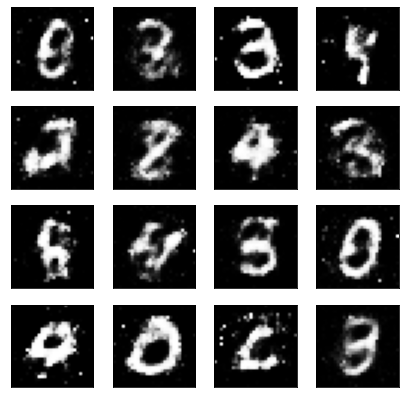

In [13]:
view_samples(-1, samples)

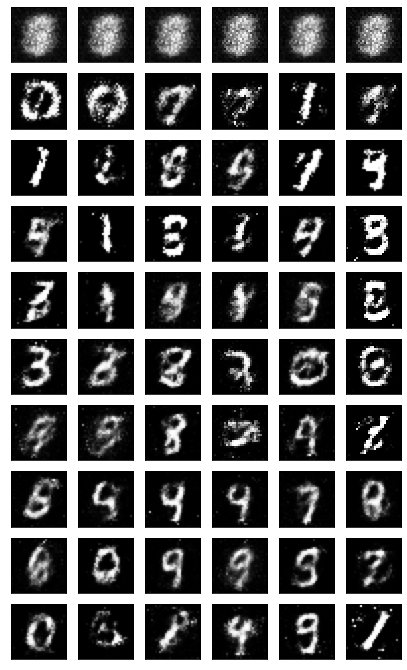

In [14]:
rows = 10 # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        img = img.detach()
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


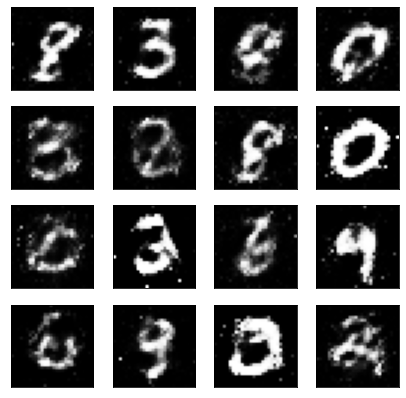

In [42]:

# # randomly generated, new latent vectors
sample_size=16
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float()

G.eval() # eval mode
# # generated samples
rand_images = G(rand_z)

# # 0 indicates the first set of samples in the passed in list
# # and we only have one batch of samples, here
view_samples(0, [rand_images])

torch.Size([100])
0 tensor([-1.6188e+00,  8.0417e-01,  1.2677e+00,  8.8499e-01, -1.2706e+00,
        -1.0181e+00, -4.4101e-01,  1.2174e+00, -8.6571e-01,  4.7904e-01,
         1.9537e-03,  1.3783e-01, -6.1389e-01,  1.6463e+00, -1.5133e+00,
        -1.0512e+00,  1.2658e+00, -1.0004e+00, -1.1359e+00, -8.9414e-01,
         1.0276e+00,  1.6005e+00,  3.4190e-01, -7.2348e-01, -1.1562e+00,
        -1.2363e-01,  5.4461e-01, -1.6177e+00, -1.5043e+00,  2.4269e+00,
        -4.6551e-01, -1.6983e-01, -5.1952e-01, -9.7106e-01,  4.5679e-01,
        -1.7296e+00,  1.4852e-01,  1.4219e+00,  1.8146e+00,  3.2390e-01,
         6.2562e-01,  2.0242e-01, -1.1996e+00, -4.8377e-01, -3.8966e-01,
         5.5272e-01, -1.1337e-01,  1.2930e+00,  4.8239e-01, -1.7185e+00,
        -5.7029e-01, -8.8679e-02, -7.0470e-01, -1.9775e-02,  2.9077e-01,
         7.2077e-01, -3.5331e-03, -7.6571e-01, -3.1451e-01,  5.5488e-01,
         1.4340e+00,  1.5056e-01,  1.8931e+00,  2.1457e+00, -7.9131e-01,
        -1.6175e+00,  8.4925e-0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([784])
1 tensor([-2.4921e-01,  5.0047e-01,  3.5989e-01, -6.9074e-02, -2.9266e-02,
        -5.1837e-01, -2.1050e-01,  2.3531e-01,  1.9008e-01, -1.2057e+00,
        -9.2395e-01, -5.4709e-02, -1.3691e+00, -3.0297e-01,  7.3512e-01,
        -7.3394e-01,  8.3995e-01,  1.1428e+00, -1.4606e-03,  1.4584e+00,
        -4.3141e-01, -2.2539e-01, -9.6796e-01,  5.7744e-03, -3.9481e-01,
         3.6431e-01,  5.7978e-02,  1.0232e+00,  2.2561e-01, -1.3370e+00,
         1.9096e+00,  2.8110e-01,  9.1205e-01, -8.7012e-01,  3.5691e-01,
        -1.6039e+00,  9.2396e-01,  4.4737e-02,  1.9136e-01,  1.9979e-01,
         1.7839e-01, -5.1495e-01,  7.9304e-01, -6.1854e-02,  5.8409e-01,
         2.0754e+00,  6.0894e-01, -1.3835e+00,  7.2500e-01,  1.6265e-01,
         4.1533e-01,  8.6244e-01,  1.3100e+00, -9.4585e-01, -1.6984e+00,
         2.0833e-01, -4.0270e-01,  7.0646e-01,  1.1034e+00,  3.9314e-01,
         1.5677e-01, -6.7047e-01, -1.1900e+00,  1.1385e+00,  3.2964e-01,
         1.5302e+00,  5.5535e-0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


torch.Size([784])
21 tensor([ 0.7944, -0.2382,  0.0419, -0.1414,  0.3510, -0.0775,  1.0362, -0.1336,
        -0.2101, -0.2803, -0.3463, -0.7959,  0.7567, -0.7918, -0.6539, -0.3393,
         0.0884,  0.7367, -0.4853, -0.1730, -0.7004, -2.8274, -0.3019, -1.5680,
         1.7275, -0.7535,  1.4834, -2.9356, -1.4823,  0.9414,  0.7215, -1.2065,
         0.5639,  0.7091,  0.4621, -0.3983, -1.7817,  0.6116,  1.2018,  1.2446,
        -1.2710,  1.4978,  0.0210, -1.7935,  1.6253,  1.8394, -0.0200,  1.3244,
         0.8725,  0.7293, -0.4571,  0.4548, -0.2144,  0.7687, -1.6992,  1.7675,
        -0.1010, -0.3443, -0.4421,  0.2322,  0.2416, -0.6449, -1.2755,  0.2290,
         0.0426,  0.7518,  0.1550, -0.9845,  0.9044,  0.7905,  0.3530, -0.5880,
         1.3933,  2.4160,  0.8703, -1.0111,  0.6761, -1.2294,  0.1829,  0.7166,
         0.4903, -0.7197,  0.3718,  0.3321,  1.0615, -0.2290, -0.5785,  0.3990,
         0.0421,  0.4421, -0.9374,  0.1100, -0.1438, -0.8000, -0.1406,  1.2483,
        -0.0253,  1

KeyboardInterrupt: ignored

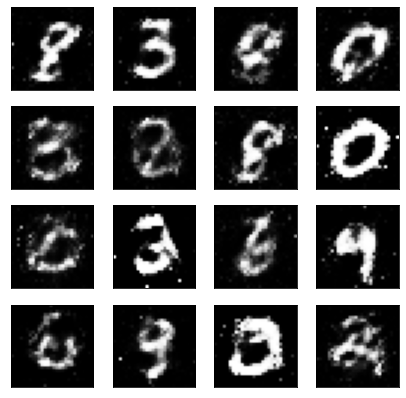

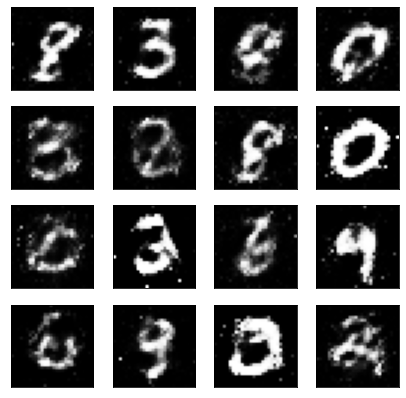

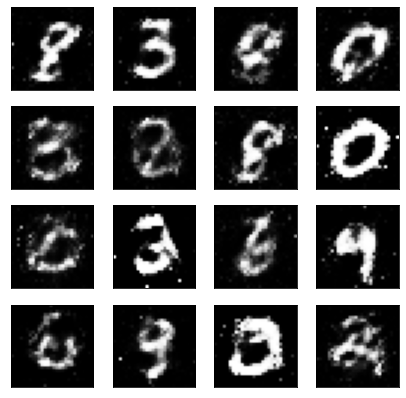

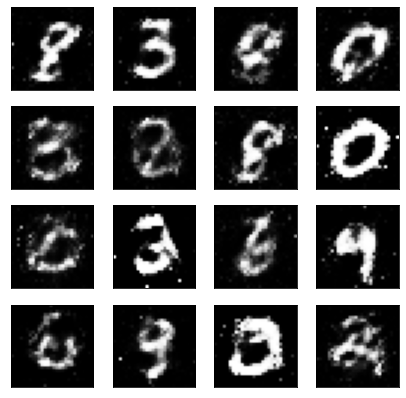

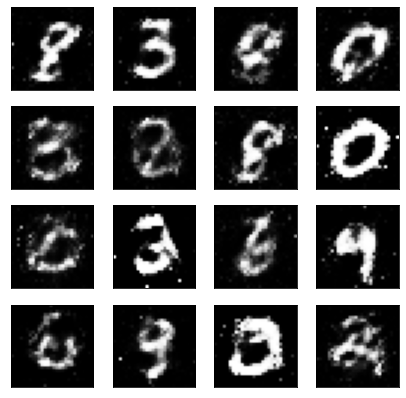

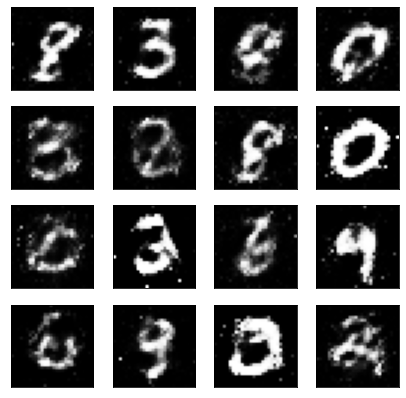

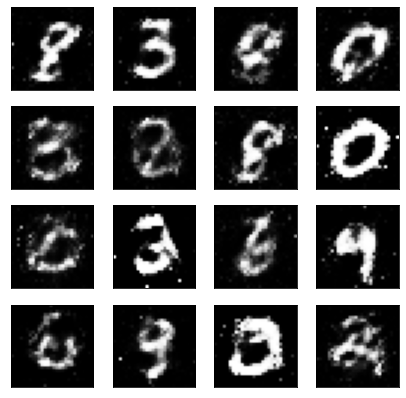

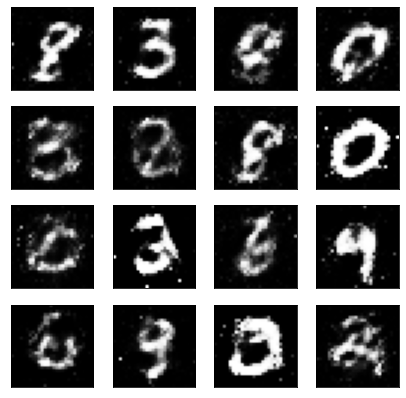

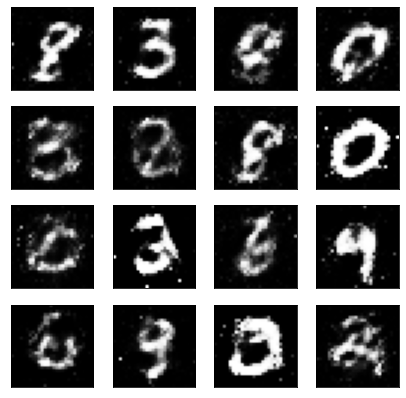

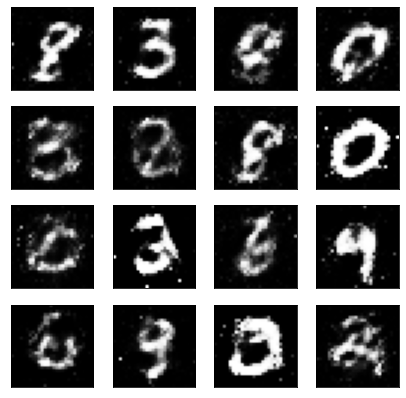

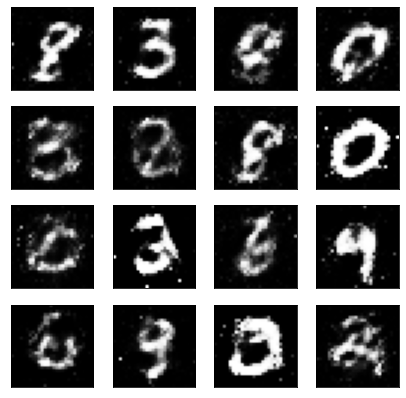

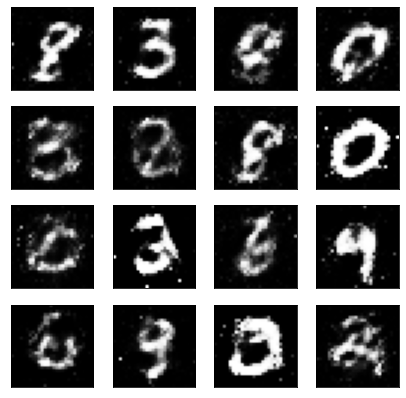

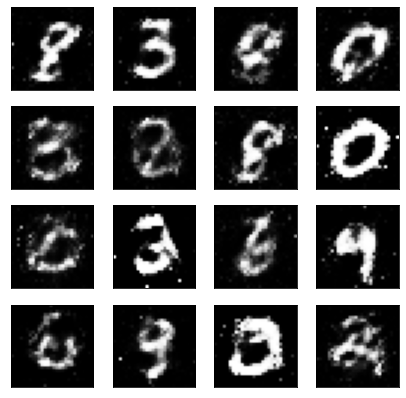

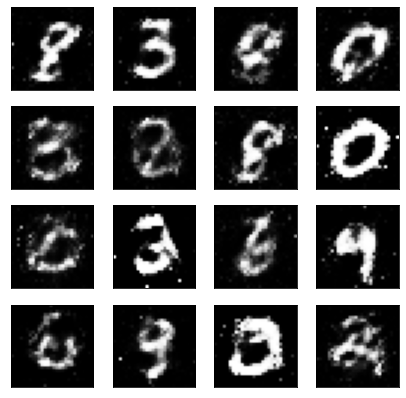

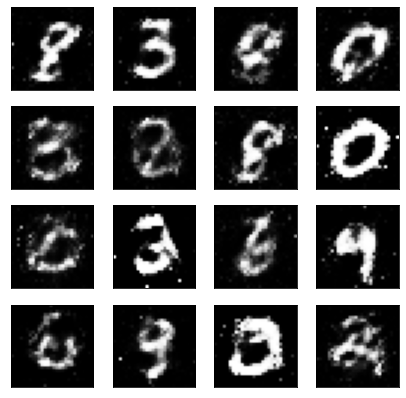

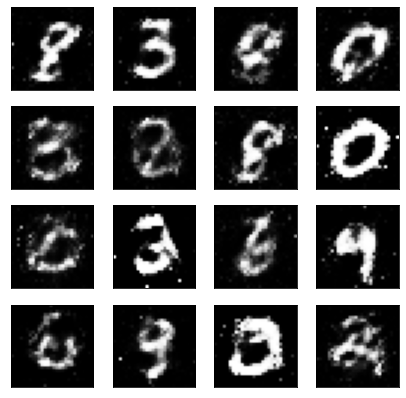

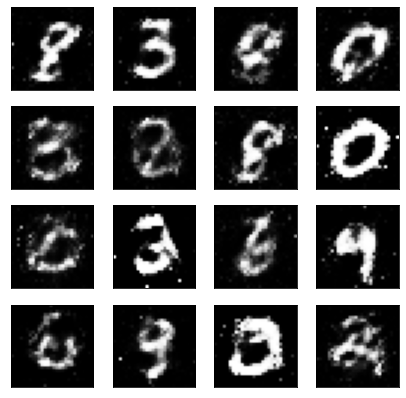

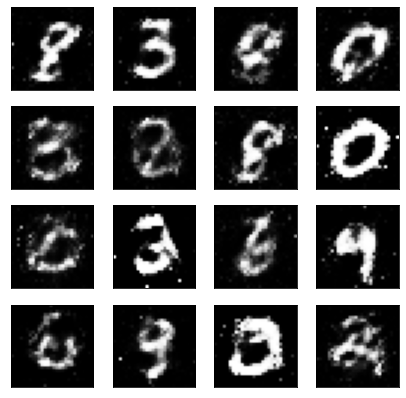

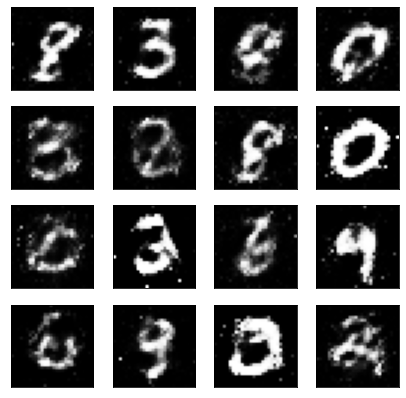

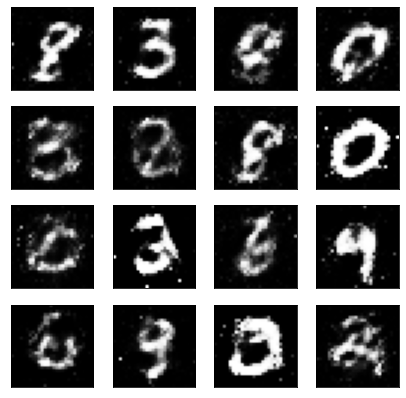

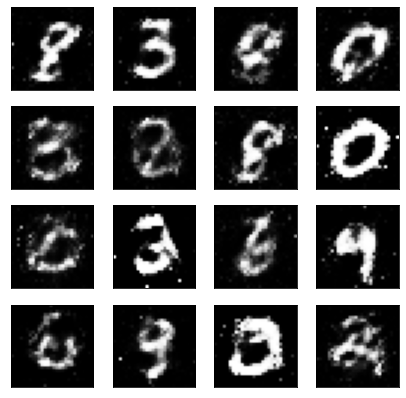

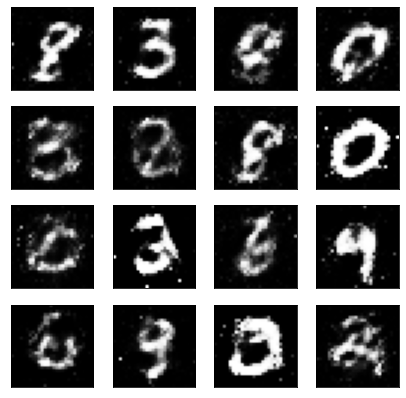

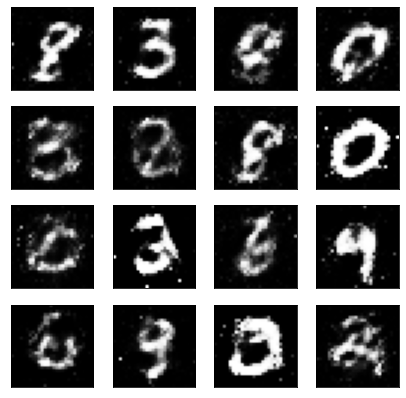

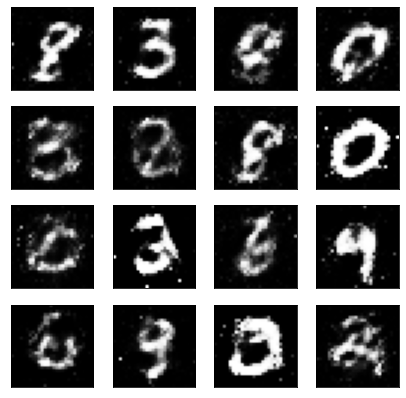

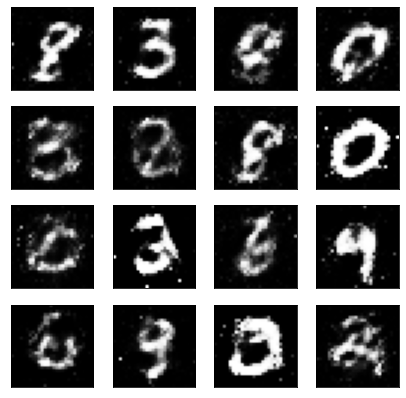

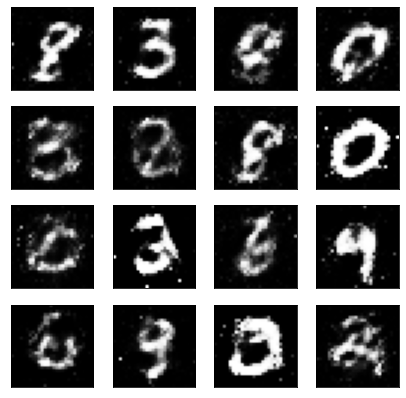

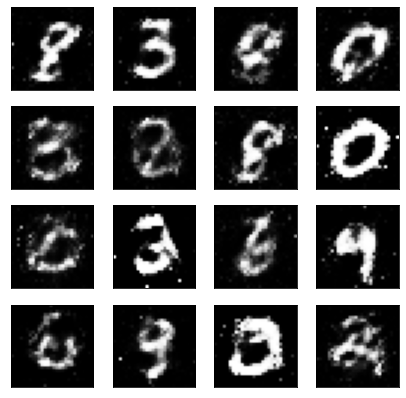

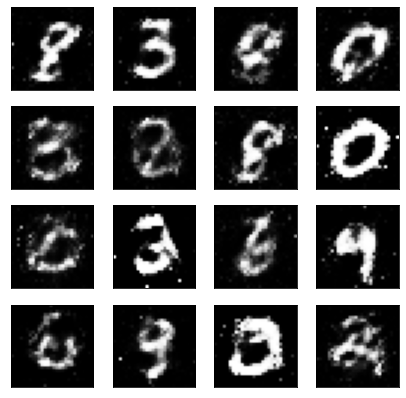

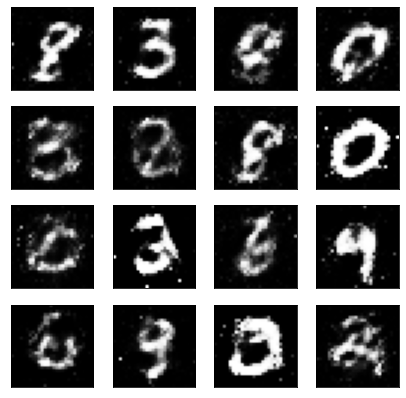

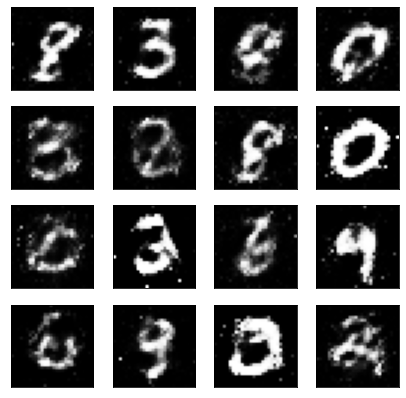

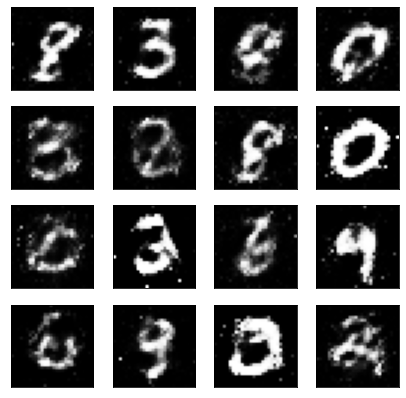

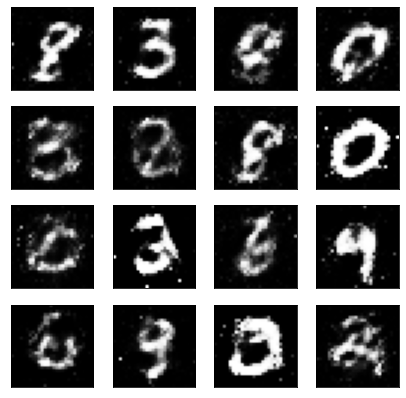

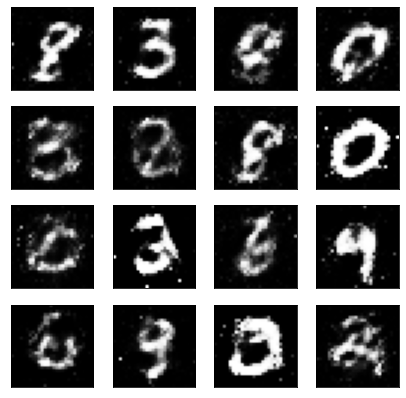

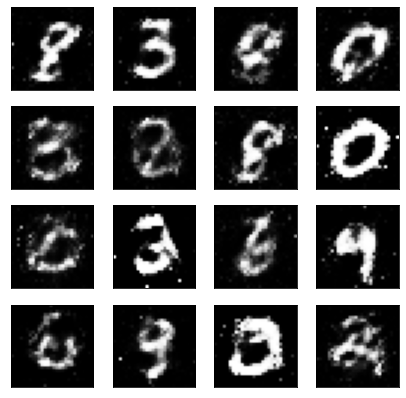

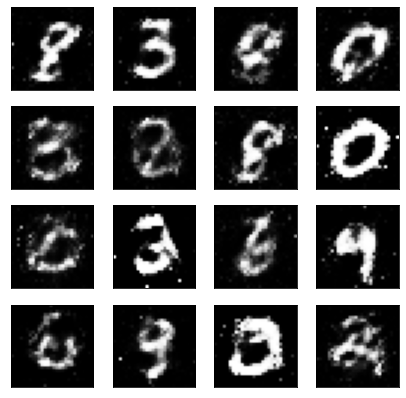

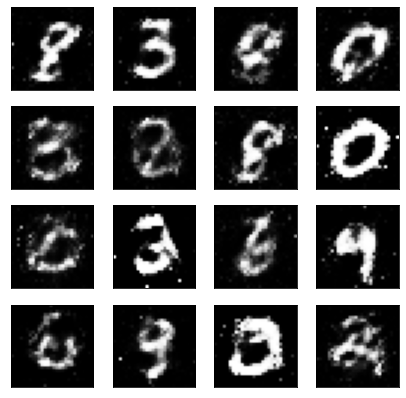

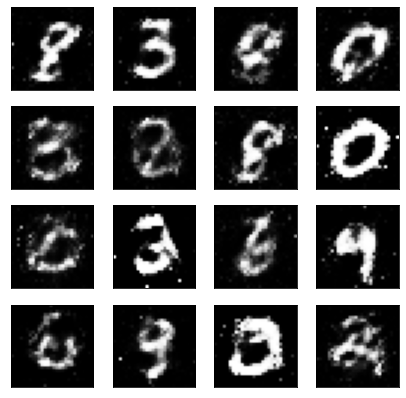

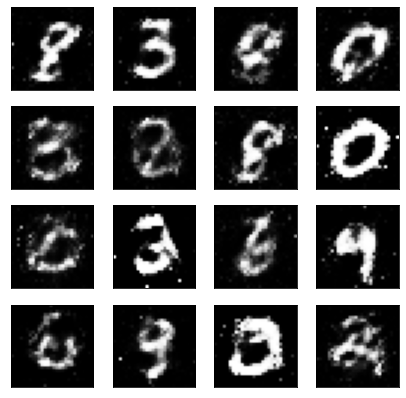

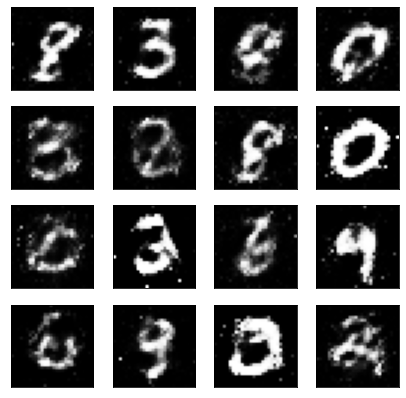

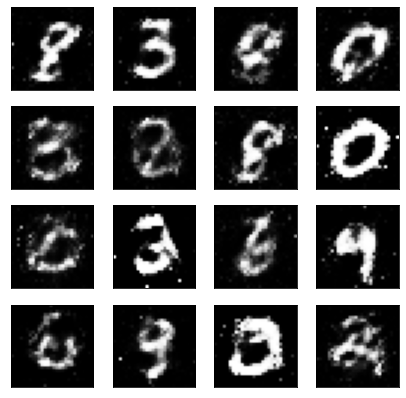

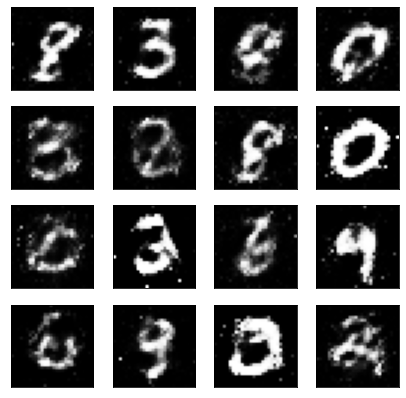

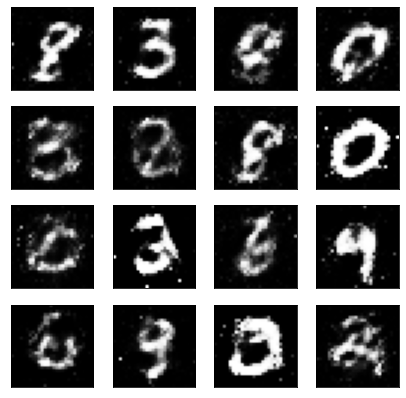

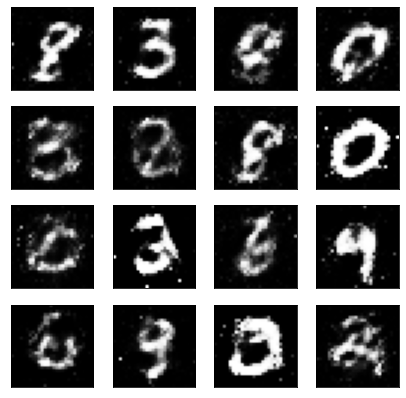

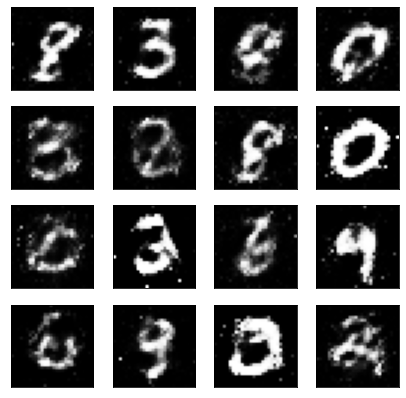

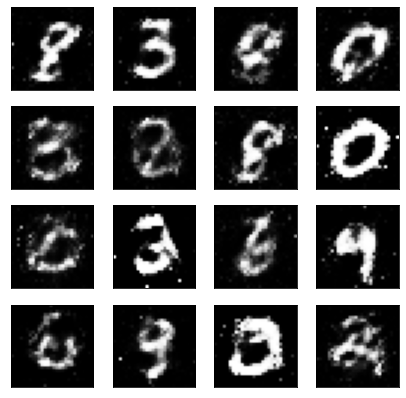

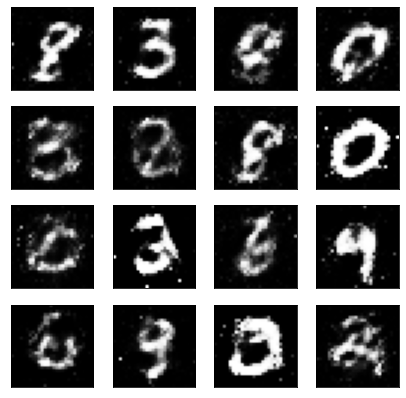

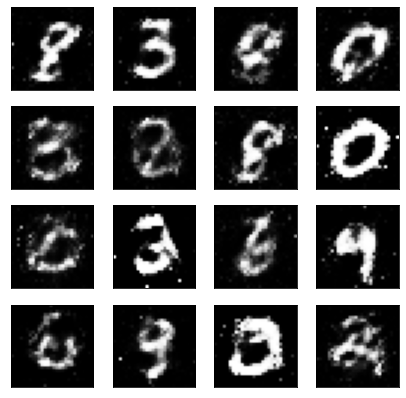

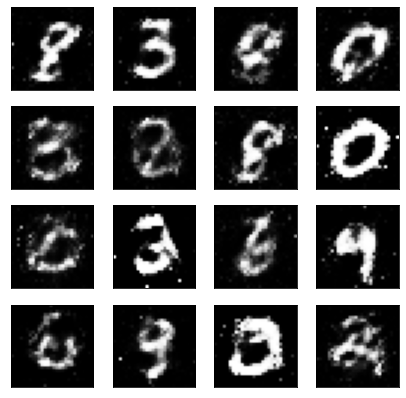

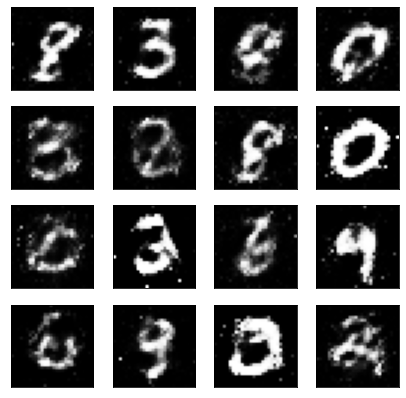

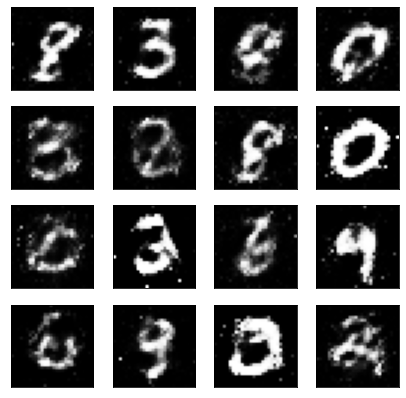

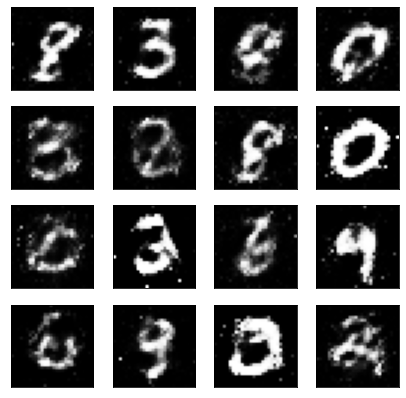

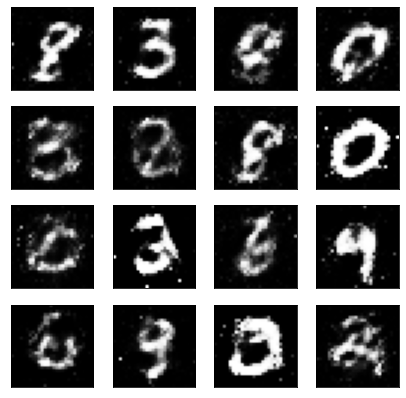

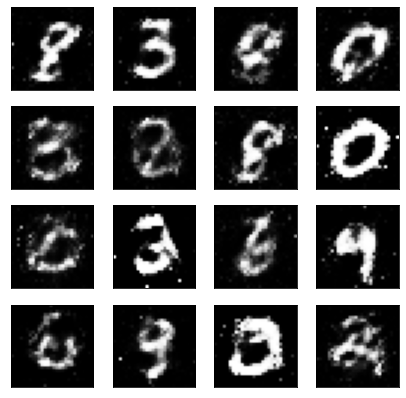

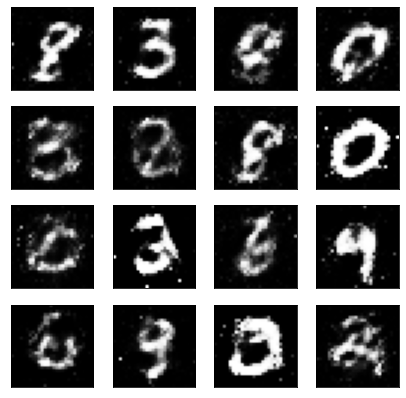

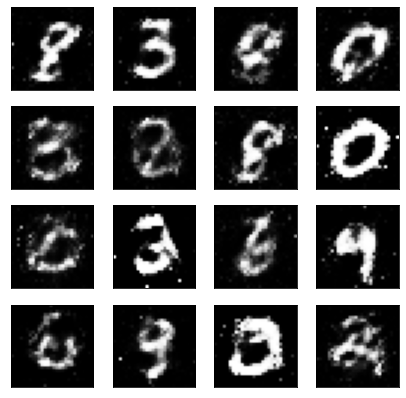

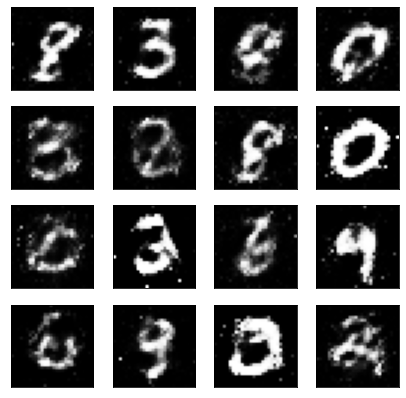

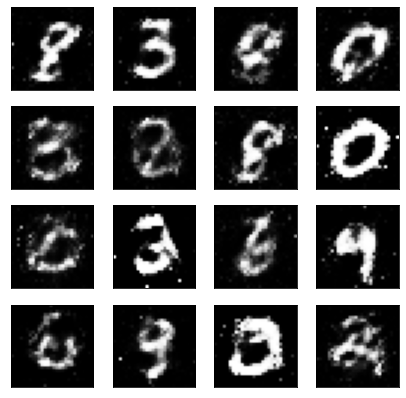

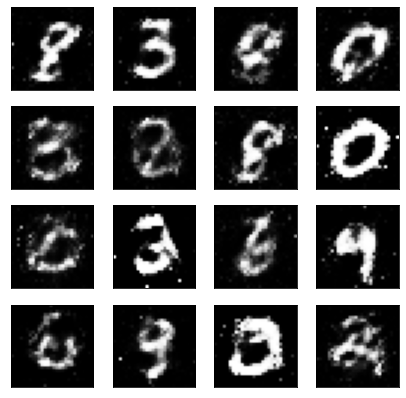

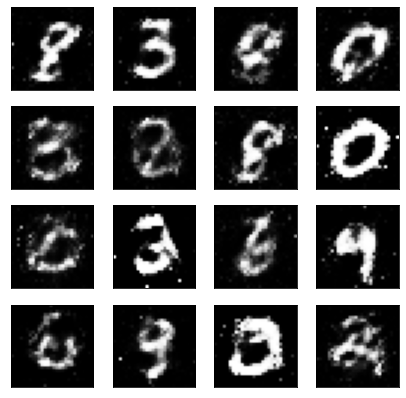

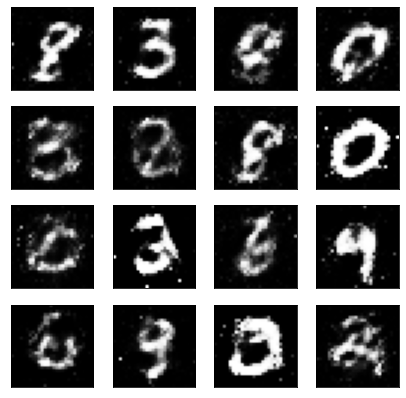

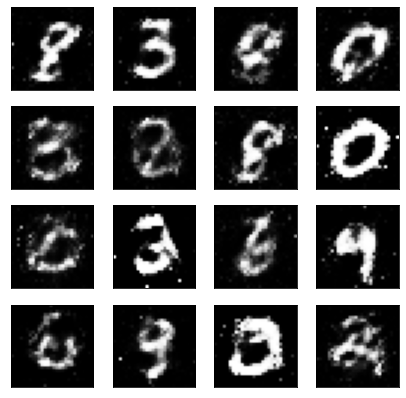

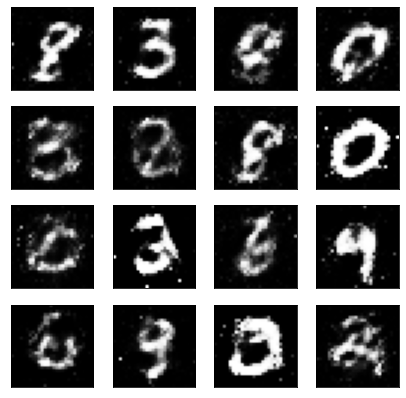

In [ ]:
from torch.autograd import Variable
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
bs = 100 #Batch Size
z_dim = 100 #Z dimensions
z = Variable(torch.randn(bs, z_dim).to(device))

print(z[0].size())

G.eval() # eval mode

root = '/content'


for i, image_tensor in enumerate(z):
    image_tensor = image_tensor.detach()
    print(i,image_tensor)

    # save latent vector related to the image
    f = open(root + r'/images/%d.txt' %i,'a')
    f.write(np.array2string(image_tensor[0].numpy(), separator=','))
    f.close()

    G.eval()
    rand_image = G(image_tensor)
    view_samples(0, [rand_images])
    print(rand_image.size())

    # save image
    rand_image = rand_image.view(-1, 28)
    save_image(rand_image, root + r'/images/%d.png' %i, normalize = True)



torch.Size([100])
0 tensor([ 0.9843, -0.0360, -0.2150,  0.0794, -0.6932, -0.2580,  0.0877,  0.3213,
        -0.2139, -0.1147, -0.6309, -0.5458, -0.4418,  0.1303, -0.7718, -0.9235,
        -0.3748,  0.7344,  0.1204,  0.5006, -0.8254, -0.8892, -0.3336, -0.9537,
        -0.2248,  0.7882,  0.0986,  0.6221,  0.7872,  0.8781,  0.5961,  0.5831,
        -0.1045,  0.3952, -0.8100, -0.8626, -0.0183,  0.0121,  0.9142, -0.6837,
         0.5047, -0.6361,  0.8260, -0.3315, -0.0625, -0.1748, -0.1763,  0.5147,
         0.4938, -0.4668,  0.5201,  0.5722,  0.6885,  0.4481, -0.9488, -0.2206,
         0.4127,  0.4240, -0.6575,  0.8300,  0.1169, -0.7502,  0.8801, -0.5713,
         0.6345, -0.7825, -0.8842,  0.6114,  0.0403, -0.5328,  0.5639,  0.5822,
         0.7530,  0.3494, -0.8190,  0.0098,  0.4118, -0.4662,  0.3009,  0.0012,
         0.9688,  0.6086, -0.0736, -0.4050,  0.6766,  0.6320,  0.4430, -0.2717,
         0.8811,  0.0068,  0.1237, -0.0407, -0.2022,  0.5813,  0.8546, -0.7781,
         0.2572,  0.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([784])
torch.Size([28, 28])
1 tensor([ 0.8031, -0.6406, -0.8416, -0.6988, -0.0530,  0.8683, -0.3282, -0.3572,
        -0.8446, -0.9952, -0.3441,  0.0489,  0.4355, -0.5063,  0.5920, -0.7084,
         0.5977, -0.6219, -0.6211, -0.1239, -0.0066, -0.7994,  0.1185,  0.2027,
         0.4704,  0.6701, -0.5439,  0.7749, -0.1155, -0.5792, -0.3241, -0.0376,
        -0.2730,  0.2858,  0.4257, -0.4635,  0.1663,  0.4137, -0.9495,  0.4675,
        -0.8814,  0.1427, -0.8807,  0.1415, -0.9464, -0.3394, -0.4912, -0.3810,
        -0.1902, -0.3596, -0.7599, -0.4745,  0.0116, -0.8923,  0.7662,  0.3722,
         0.5224, -0.3830, -0.1323, -0.5215,  0.1904,  0.1946, -0.1543,  0.7118,
         0.9701,  0.8782,  0.0440, -0.1448,  0.0824, -0.9556,  0.4941,  0.0083,
        -0.7177, -0.0867, -0.3934,  0.1553,  0.2348,  0.2536,  0.3394, -0.5250,
         0.0868, -0.5792, -0.1099, -0.8499, -0.3673,  0.1496, -0.8608,  0.8657,
        -0.2159, -0.0185, -0.5822,  0.0455, -0.7855, -0.3033, -0.1656,  0.0650,

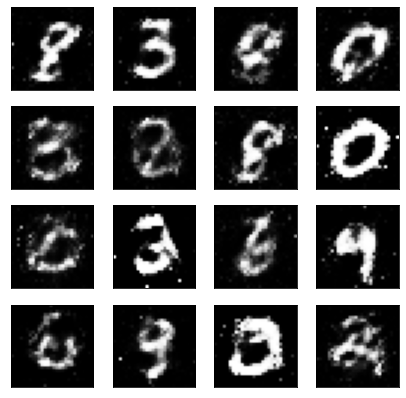

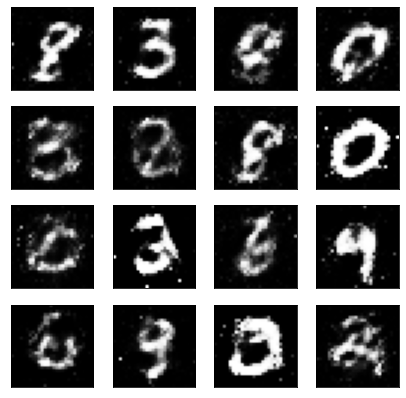

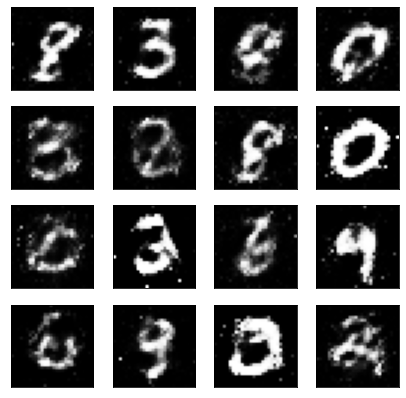

In [48]:
# from torch.autograd import Variable
# #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
# bs = 100 #Batch Size
# z_dim = 100 #Z dimensions
# z = Variable(torch.randn(bs, z_dim).to(device))

sample_size=3
z = np.random.uniform(-1, 1, size=(sample_size, z_size))
z = torch.from_numpy(z).float()

print(z[0].size())

G.eval() # eval mode

root = '/content'


for i, image_tensor in enumerate(z):
    image_tensor = image_tensor.detach()
    print(i,image_tensor)

    # save latent vector related to the image
    f = open(root + r'/images/%d.txt' %i,'a')
    f.write(np.array2string(image_tensor[0].numpy(), separator=','))
    f.close()

    G.eval()
    rand_image = G(image_tensor)
    view_samples(0, [rand_images])
    print(rand_image.size())

    # save image
    rand_image = rand_image.view(-1, 28)
    print(rand_image.size())
    save_image(rand_image, root + r'/images/%d.png' %i, normalize = True)



In [ ]:
# from torch.autograd import Variable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# bs = 100 #Batch Size
# z_dim = 100 #Z dimensions
# z = Variable(torch.randn(bs, z_dim).to(device))


# for i, z in enumerate(z):
#     print(i,z.size())


0 torch.Size([100])
1 torch.Size([100])
2 torch.Size([100])
3 torch.Size([100])
4 torch.Size([100])
5 torch.Size([100])
6 torch.Size([100])
7 torch.Size([100])
8 torch.Size([100])
9 torch.Size([100])
10 torch.Size([100])
11 torch.Size([100])
12 torch.Size([100])
13 torch.Size([100])
14 torch.Size([100])
15 torch.Size([100])
16 torch.Size([100])
17 torch.Size([100])
18 torch.Size([100])
19 torch.Size([100])
20 torch.Size([100])
21 torch.Size([100])
22 torch.Size([100])
23 torch.Size([100])
24 torch.Size([100])
25 torch.Size([100])
26 torch.Size([100])
27 torch.Size([100])
28 torch.Size([100])
29 torch.Size([100])
30 torch.Size([100])
31 torch.Size([100])
32 torch.Size([100])
33 torch.Size([100])
34 torch.Size([100])
35 torch.Size([100])
36 torch.Size([100])
37 torch.Size([100])
38 torch.Size([100])
39 torch.Size([100])
40 torch.Size([100])
41 torch.Size([100])
42 torch.Size([100])
43 torch.Size([100])
44 torch.Size([100])
45 torch.Size([100])
46 torch.Size([100])
47 torch.Size([100])
48

In [33]:
from torchvision.utils import save_image
import torch
import torchvision
import numpy as np

rand_tensor= torch.rand(64, 3,28,28) 
root = '/content'


for i, image in enumerate(rand_tensor[0]):
    image = image.detach()

    # save latent vector related to the image
    f = open(root + r'/images/%d.txt' %i,'a')
    f.write(np.array2string(rand_tensor.numpy(), separator=','))
    f.close()

    # save image
    print(image.size())
    image = image.view(-1, 28*28)
    print(image.size())
    save_image(image, root + r'/images/%d.png' %i, normalize = True)


torch.Size([28, 28])
torch.Size([1, 784])
torch.Size([28, 28])
torch.Size([1, 784])
torch.Size([28, 28])
torch.Size([1, 784])
